In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
df = pd.read_csv(url)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Information of the Dataset

Survived is Target Column and 
0 = "Dead" and 1 = "Survived"

PClass =1 = 1st Class
        2 = 2nd Class
        3 = 3rd Class

SibSp = No. of Siblings/Spouses

Parch = No. of Parents/Children

Cabin = Cabin Number

Embarked = Port of Embarkation
          C = Cherbourgh
          Q = Queenstown
          S = Southampton



In [38]:
df.shape

(891, 12)

Total Rows are 891 and columns are 12

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation**  :  Missing value in Age - Cabin and Embarked 
                
                String value -   Name, Sex, Ticket, cabin , embarked
                
                Integer type - Passenged ID, Survived,Pclass,Sibsp,Parch
                
                Float type - Age,Fare

Data Type of each columns :
Cateorical / Nominal :  e.g : Embarked

Binary Data  : eg : Sex

Ordinal : Pclass

Continous :eg : Age , Fare

count : sibsp, parch
useles:  Passenger ID, Name, Cabin, Ticket number columns

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observation :**

The columns having a null value are : Age /  Cabin / Embarked. 

They need to be filled up with appropriate values 

In [41]:
# drop the cabin column from the dataframe
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [42]:
# Checking the Data info after the irrelavant columns dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Replacing the missing value in Age and Embarked columns

In [43]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [44]:
df["Age"].isnull().sum()

0

*** Observation *** :  Missing value in age is replace by mean value of age.

Now, we will replace the missing value of Embarked columns where the value is categorical, so we will use mode.









In [45]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

Checking the missing value again

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [47]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

*** Observation *** : Now there is no null values

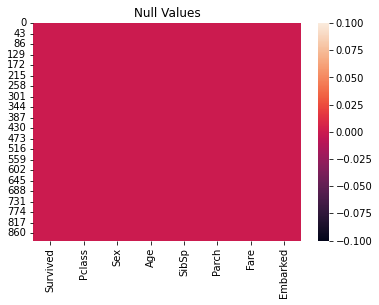

In [48]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Observation : we have checke the null value by figure and above it with graph which show there is no null value present in data now. 

In [49]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

** Observation: ** show the Total count of  0: Dead, 1:Survived Passengers

# Data Visualization

In [50]:
# Data Visualization
import seaborn as sns

0    549
1    342
Name: Survived, dtype: int64


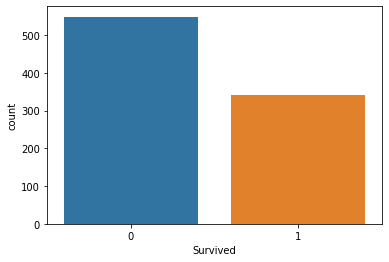

In [51]:
# show the bar for Survied and Dead Passengers
sns.countplot("Survived",data=df)
print(df["Survived"].value_counts())
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


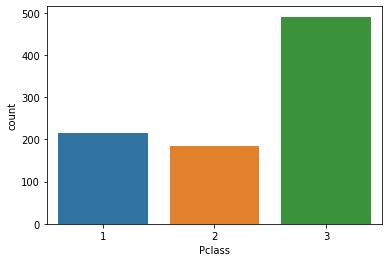

In [52]:
# Pclass Visulization 
sns.countplot(x="Pclass",data=df)
print(df["Pclass"].value_counts())

*** Observation *** : Higest number of passengers are traveling in  3rd Class, following by 2nd class and 1st calss.

male      577
female    314
Name: Sex, dtype: int64


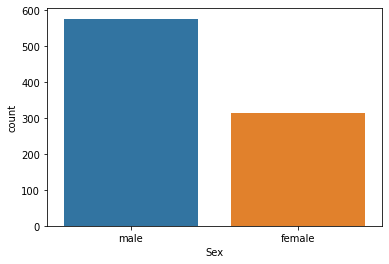

In [53]:
# mainga a count of sex column
print(df["Sex"].value_counts())
sns.countplot("Sex",data=df)


Observation : High number of Male Passenges are traveling compare to female passengers. 

Age 0 to 20 : 179 
 Age 21 to 40 : 561 
 Age 41 and over : 148


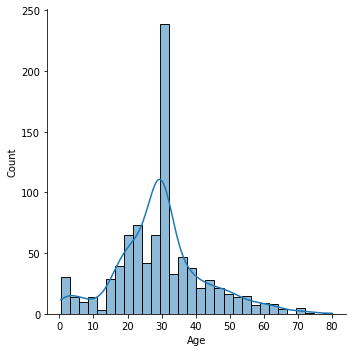

In [54]:
# Visulization for Age
import numpy as np
sns.displot(df["Age"],kde=True)
Age0to20 = df[df["Age"].between(0,20)]
Age21to40 =df[df["Age"].between(21,40)]
Age41over = df[df["Age"].between(41,100)]
print("Age 0 to 20 :",len(Age0to20),"\n", "Age 21 to 40 :",len(Age21to40),"\n","Age 41 and over :",len(Age41over))


*** Observation *** :  Higest number of Passengers were between 21-40 years age, followed by 0-20 years old and then above 41 years old.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


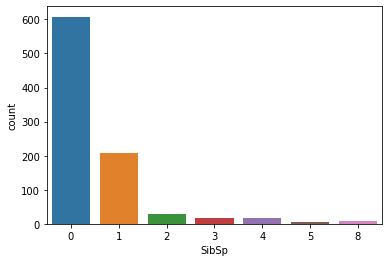

In [55]:
# Visulization for Sibsp
sns.countplot(x="SibSp",data=df)
print(df["SibSp"].value_counts())

***Observation *** Highest number of Pasenges has No siblings or spouse.

2nd Higher number of passenger had only 1 siblings or spounse.

Rest of teh passengers are very small number with siblings or spouse.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


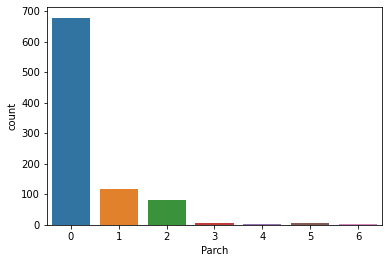

In [56]:
# Visualisation of Parch
sns.countplot(x="Parch",data=df)
print(df["Parch"].value_counts())

*** Observation *** : Parch defines family relations  Parents [ Monthly/Father]

/ child =daughter , son, stepdaughter,stepson

678 passengers were travelling with 0 Parch. 
118 Passengers were traveling with 1 family members 

80 passenges were travelling with 2 family member

rest might traveling with their parents and siblinings.



            Fare           
             max       mean
Pclass                     
1       512.3292  84.154687
2        73.5000  20.662183
3        69.5500  13.675550


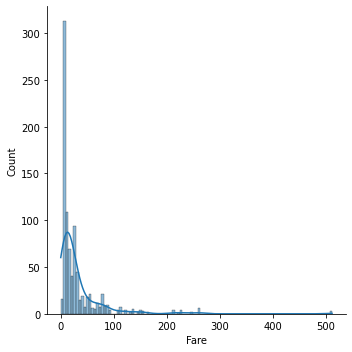

In [57]:
#Visulization of Fare
sns.displot(df["Fare"],kde=True)
print(df.groupby("Pclass").agg({"Fare":["max","mean"]}))

*** Observation *** : Mean price of 3rd class is 13.67 , 2nd class 20.66  and 1st class is 84.15  , but from the graph we can see the tail reach to 512.32 

so passenge paid way high price then mean value of each class.  

which also represent the skewness in data.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


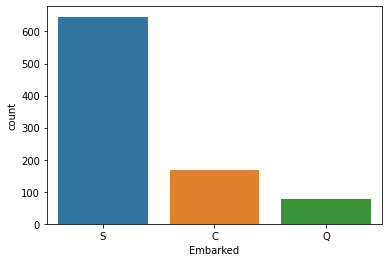

In [58]:
# Visulization for Embarked

sns.countplot(x="Embarked",data=df)
print(df["Embarked"].value_counts())

Observation :

Suthampton = 646 passenger onboard 

Cherbourg = 168 Passenger onboard 

Queenstown = 77 passenged onboard

Survived    0    1
Sex               
female     81  233
male      468  109


        Survived
Sex             
female  0.742038
male    0.188908


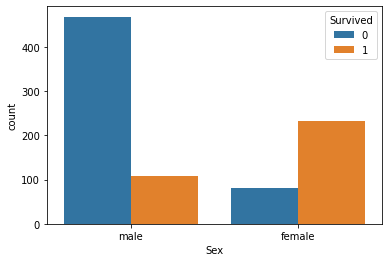

In [59]:
# number of survivors by genderwise
print(df.groupby(["Sex","Survived"]).size().unstack(fill_value=0))
print("\n")
print(df.groupby("Sex")[["Survived"]].mean())
sns.countplot("Sex",hue="Survived",data=df)

Above figure show the Survival number for male fimale and Ratio of survival for male female

Observation = Comparing the male and female vs Survived or not.
              In male survived member are very less compare to Female member.
              Female has more survived ration then male.

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


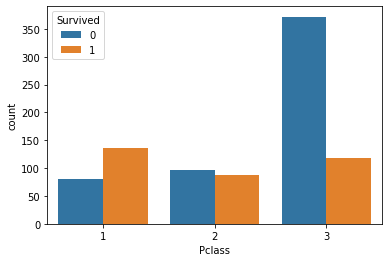

In [60]:
# number of survivors by Pclass
sns.countplot("Pclass",hue="Survived",data=df)
print(df.groupby(["Pclass","Survived"]).size().unstack(fill_value=0))

Observation = From above obseration we can clearly see that 1st class passenger has high survival ratio, then 2nd class and 3rd class passenger

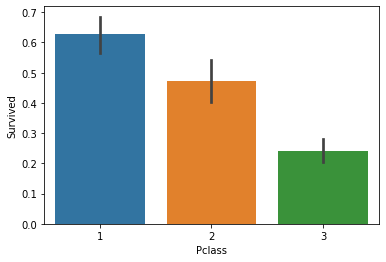

In [61]:
# plot the survival rate of with each class:
sns.barplot(x="Pclass",y="Survived",data=df)

Above barplot show the over 60% of the 1st class passenger survived, and less then 30% is survived in 3rd class.

In [62]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


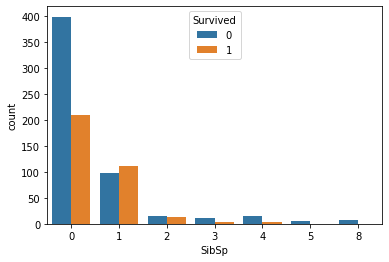

In [63]:
# Visulization for Sibsp
sns.countplot(x="SibSp",hue="Survived",data=df)
print(df["SibSp"].value_counts())
print(df.groupby(["SibSp","Survived"]).size().unstack(fill_value=0))


*** Observation *** - number of survival is highed with 1 sibling/spouse compare to any others. 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


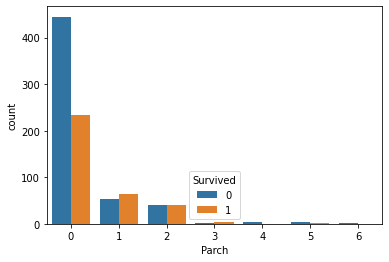

In [64]:
# Visulization for Parch
sns.countplot(x="Parch",hue="Survived",data=df)
print(df["Parch"].value_counts())
print(df.groupby(["Parch","Survived"]).size().unstack(fill_value=0))


*** Observation *** - it shows that with 1 (parents / child)  has highest survival then other passenge with parents/child.

S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    219
C     93
Q     30
Name: Embarked, dtype: int64


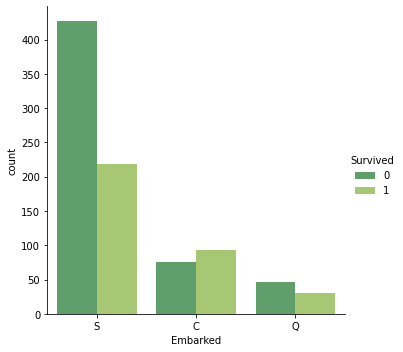

In [65]:
print(df["Embarked"].value_counts())
print(df[df["Survived"]==1]["Embarked"].value_counts())
sns.catplot(x="Embarked",kind="count",data=df,palette="summer",hue="Survived")

Observation : 

1.   Suthampton = 646 passenger onboard - 219 survived

2.   Cherbourg = 168 Passenger onboard - 93 survived
3.   Queenstown = 77 passenged onboard - 30 

 

In [66]:
# Minimum and Maximum age by Male Female

print("Female min Age: ",df[df["Sex"]=="female"]["Age"].min())
print("Male Min Age: ",df[df["Sex"]=="male"]["Age"].min())

print("Female min Age: ",df[df["Sex"]=="female"]["Age"].max())
print("Male Min Age: ",df[df["Sex"]=="male"]["Age"].max())


Female min Age:  0.75
Male Min Age:  0.42
Female min Age:  63.0
Male Min Age:  80.0


In [67]:
# Look at survival rate by Sex, Age, Pclass
age = pd.cut(df["Age"],[0,18,80])
df.pivot_table("Survived",["Sex",age],"Pclass")

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

From above table we can see identify that, female with 18 and older on first class has highest survival rate 97%,  and Mens between 18 to 80 with first class has only 35% survival rate. 

Lowest survival rate is on 2nd class , men = 8.60% only

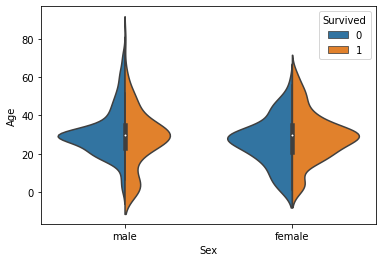

In [68]:
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df,split=True)

From above graph we can see the passenger data are mostly distributed between 20 to 40 age group. 

# Fare Visulisation with Class

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


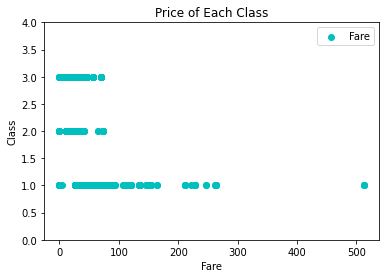

In [69]:
# Price of Each class
print(df.groupby("Pclass")["Fare"].mean())
plt.scatter(df["Fare"],df["Pclass"],color="c",label="Fare")
plt.ylabel("Class")
plt.xlabel("Fare")
plt.title("Price of Each Class")
plt.ylim(0,4)
plt.legend()
plt.show()



*** Observation *** from the graph we can see that price paid by 1st class passenge was way too high then average price.   

Text(0.5, 1.0, 'MALE')

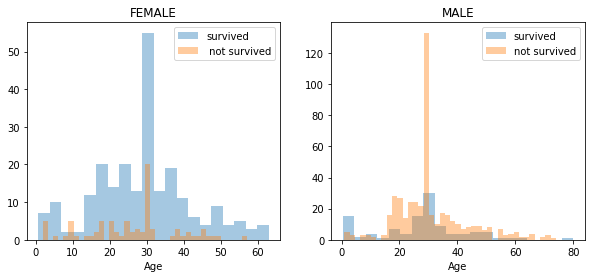

In [70]:
# AGE AND SEX CORRELATION ON SURVIVAL

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']

ax = sns.distplot(female[female['Survived'] == 1].Age.dropna(), bins = 20 , label = 'survived', ax = axes[0], kde = False)
ax = sns.distplot(female[female['Survived'] == 0].Age.dropna() , bins = 40 , label =' not survived' ,  ax = axes[0] , kde = False)
ax.legend()
ax.set_title('FEMALE')


ax = sns.distplot(male[male['Survived'] == 1].Age.dropna(), bins = 20 , label ='survived', ax =axes[1] ,kde = False)
ax = sns.distplot(male[male['Survived'] == 0].Age.dropna(), bins = 40 ,label ='not survived', ax = axes[1],kde =False)
ax.legend()
ax.set_title("MALE")

*** Observation ***
After analyzing the output we get to know that there are certain ages where the survival rate is greater. For women survival, chances are higher between 14 and 40. While men have a high probability of survival between 18 and 30. Between the ages of 5 and 18 men have a low probability of survival while that isn’t true for women. So Age is an important attribute to find Survival.

In [71]:
# getting the description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


Observation :  Statistic analysis of the date represent that there are no null / missing value in data. 

Survival mean value is 0.38 which represent only 38% passenger survived.

PClass - Maximum number of passenger travelling in 3rd class and 1st class are lowest.

Gender :  Male passenger traveller were higher then female passenge.

Fare : mean is higher then median so passenger paid much higher fare then their average price. 






# Checking the correlation between the features

In [72]:
print(df.corr())


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000


***Observation *** : Pcalss has negative correlation to Target , as we have seen from Pcalss that 1st class passenger survived more than any other class. 

Age has very nominal correlation to Target column.

Sibsp Parch has nominal correlation to target column as well. 




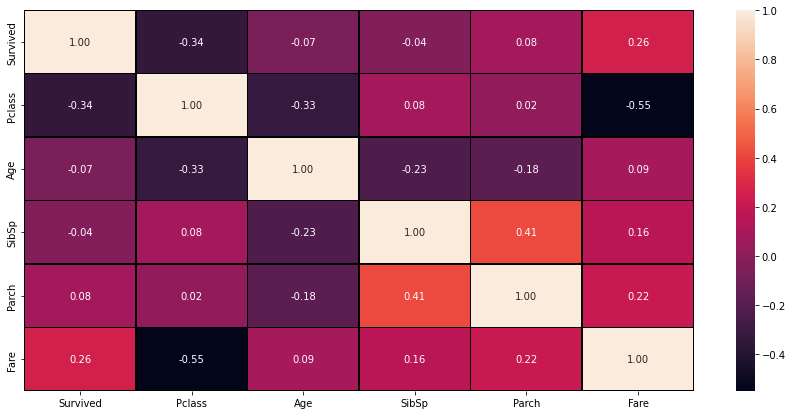

In [73]:
plt.figure(figsize=(15,7))
sns.heatmap(data=df.corr(),annot=True,fmt="0.2f",linecolor="black",linewidth=0.5)

Observation from graph,  show the highly correlation with fare and Pclass.  

Pclass to Target column has good relation which we can see from the data that 1st class passenger survival rate is higher then any other class

Age, Sibsp, Parch columns vs Target column has nominal relations

Fare and Target column has some relation , as higher the price paid must be travelling in 1st class and survival rate of first class much higher compared to other class passenger. 




##  Outlier Checking

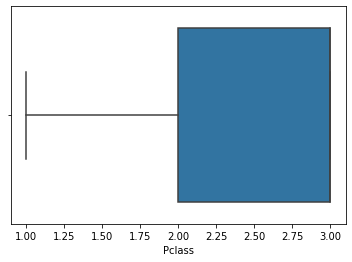

In [74]:
sns.boxplot(x=df["Pclass"])



Observation :  No outliers in Pclass

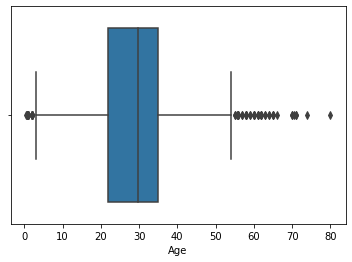

In [75]:
sns.boxplot(x=df["Age"])

Observation : Age columns has more outliers

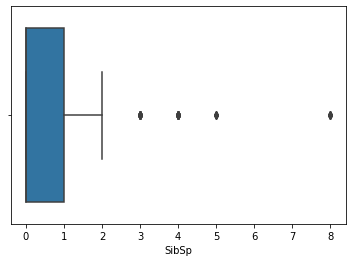

In [76]:
sns.boxplot(x=df["SibSp"])

Observation : SibSp has few outliers. 

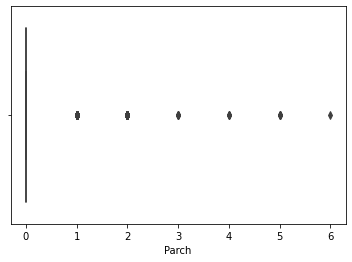

In [77]:
sns.boxplot(x=df["Parch"])

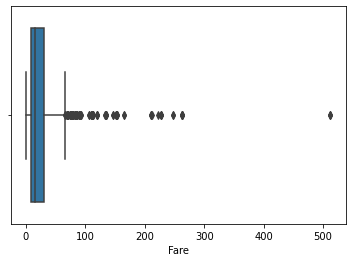

In [78]:
sns.boxplot(x=df["Fare"])

Observation : Fare columns has many outliers too.

In [79]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Outcome of Skewness : skewness threshold is +/- 0.65 
Below columns data are skewed.
Sibsp
Parch
Fare  

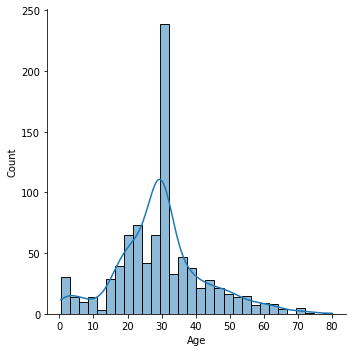

In [80]:
sns.displot(df["Age"],kde=True)

Observation :  Data is not normalised, Buildin blocks is out of normalied curve.

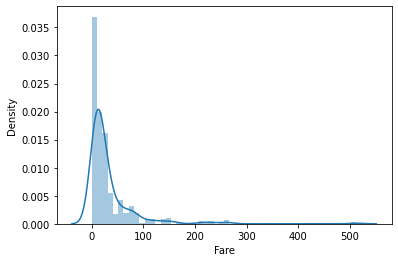

In [81]:
sns.distplot(df["Fare"])

Observation :  Data is not normalised, right skewed.

## Lable Encoding for the categorical columns

In [82]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [83]:
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [84]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Embarked,891.0,1.536476,0.791503,0.00,1.0000,2.000000,2.0,2.0000


Observation : After the label encoded for Sex Embarked columns , we can see box column in description with their statistics. 

Sex , columns we can see higher number of male passengers compare to female

Embarked,  high number of passenger on board from Category S or 2. 

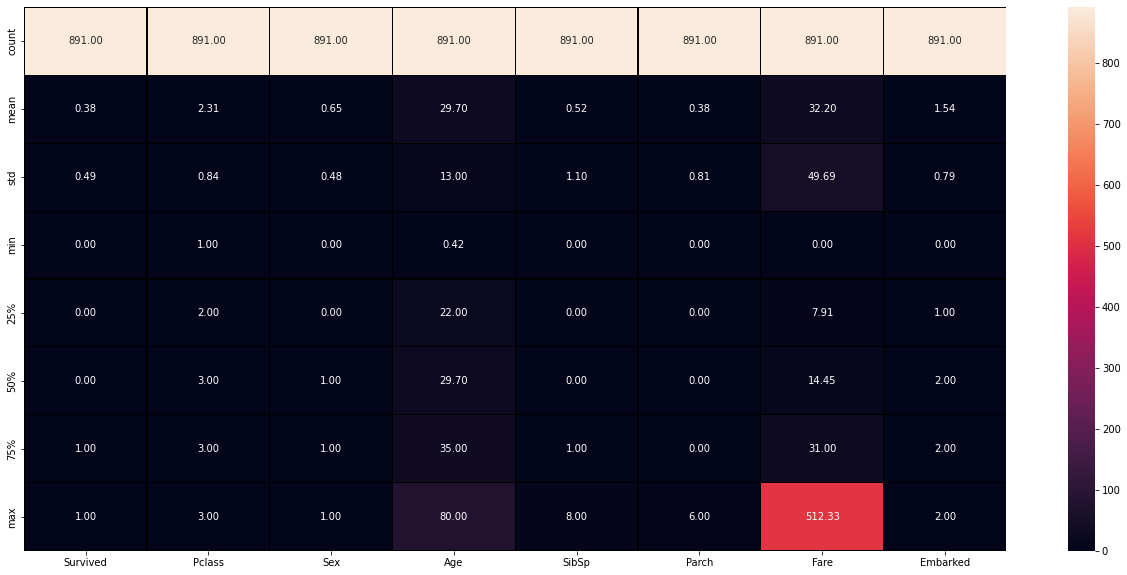

In [86]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

Observation : heat map of descrition of the date, clearly highlight the highest paid fare in Red. 

rest of the date seems normal. 

In [87]:
df.corr()["Survived"].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Observation :  Sex, Pclass and Fare have some good correlation to target column,  rest of the features has nominal relation with target columns


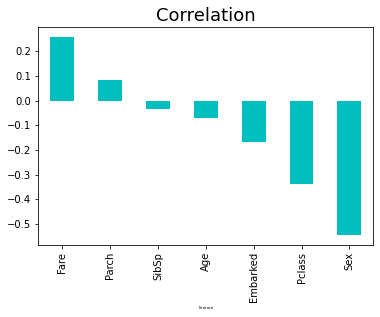

In [88]:
df.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=4)
plt.title("Correlation",fontsize=18)
plt.show()

In [89]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Observation :  Skewness is present in Sibsp/ Parch/Fare/Embarked data

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


# Removing Outliers

In [91]:
x = df.iloc[:,1:] # independant variable or feature variable
y = df.iloc[:,:1] # Dependant or Target Variable

In [92]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0


In [93]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## We are applyig Zscore to remove the outliers

In [94]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(x))
z.shape

(891, 7)

In [95]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885]), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4]))


In [96]:
x = x[(z<3).all(axis=1)]
x.shape

(820, 7)

In [97]:
y = y[(z<3).all(axis=1)]
y.shape

(820, 1)

In [98]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(820, 8)

# Percentage of Dataloss

In [99]:
loss_percentage = (891-820)/891*100
print(loss_percentage)

7.968574635241302


Data loss is less then 10% so it's reasonable to go ahead.

## Tranforming teh data to remove skewness

In [100]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method="yeo-johnson")


In [101]:
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

## Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

## Oversampling the Data

In [103]:
y.value_counts()

Survived
0           500
1           320
dtype: int64

Observation :  we can see that Target column data is not balance. so we will apply some techinique to make out data balance. 

In [105]:
# Oversampling the Data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [106]:
# Checking value count of target columns

y.value_counts()

Survived
0           500
1           500
dtype: int64

Now the data is balance.

# Since the outcome has only two variable we will use the binary classification model.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


##  Splitting the DataFrame

In [118]:
for i in range(0,1000):
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
  lr.fit(x_train,y_train)
  pred_train = lr.predict(x_train)
  pred_test = lr.predict(x_test)

  if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print("At random state",i,"The Model performs well")
    print("At Random State : ",i)
    print("Training Accuracy is : ",accuracy_score(y_train,pred_train)*100)
    print("Testing Accuracy is : ",accuracy_score(y_test,pred_test)*100)
    print("Difference of Train and Test :",(accuracy_score(y_train,pred_train)*100)-(accuracy_score(y_test,pred_test)*100))
    print("\n")


At random state 9 The Model performs well
At Random State :  9
Training Accuracy is :  79.0
Testing Accuracy is :  79.0
Difference of Train and Test : 0.0


At random state 32 The Model performs well
At Random State :  32
Training Accuracy is :  79.0
Testing Accuracy is :  79.0
Difference of Train and Test : 0.0


At random state 45 The Model performs well
At Random State :  45
Training Accuracy is :  79.0
Testing Accuracy is :  79.0
Difference of Train and Test : 0.0


At random state 93 The Model performs well
At Random State :  93
Training Accuracy is :  79.5
Testing Accuracy is :  79.5
Difference of Train and Test : 0.0


At random state 108 The Model performs well
At Random State :  108
Training Accuracy is :  79.0
Testing Accuracy is :  79.0
Difference of Train and Test : 0.0


At random state 248 The Model performs well
At Random State :  248
Training Accuracy is :  79.0
Testing Accuracy is :  79.0
Difference of Train and Test : 0.0


At random state 287 The Model performs well


 at Random State 93/467/536/661/853  prediction score is 79.5% which is highest.

Random State 853 Selected for the Model Testing

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=853,test_size=0.20)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.53      0.50      0.52       109
           1       0.44      0.46      0.45        91

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.49      0.48      0.49       200



## Cross Validation for Logistic Regression

In [124]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,100):
  lsscore = cross_val_score(lr,x,y,cv=j)
  lsc = lsscore.mean()
  print("At CV :",j)
  print("Cross Validation Score is : ",lsc*100)
  print("Accuracy Score is : ",lss*100)
  print("Differnce : ",(lsc*100)-(lss*100))
  print("\n")

At CV : 2
Cross Validation Score is :  78.3
Accuracy Score is :  79.5
Differnce :  -1.2000000000000028


At CV : 3
Cross Validation Score is :  77.90035544526562
Accuracy Score is :  79.5
Differnce :  -1.5996445547343825


At CV : 4
Cross Validation Score is :  77.1
Accuracy Score is :  79.5
Differnce :  -2.4000000000000057


At CV : 5
Cross Validation Score is :  77.8
Accuracy Score is :  79.5
Differnce :  -1.7000000000000028


At CV : 6
Cross Validation Score is :  77.60863814539594
Accuracy Score is :  79.5
Differnce :  -1.8913618546040567


At CV : 7
Cross Validation Score is :  78.30338675409098
Accuracy Score is :  79.5
Differnce :  -1.1966132459090204


At CV : 8
Cross Validation Score is :  78.3
Accuracy Score is :  79.5
Differnce :  -1.2000000000000028


At CV : 9
Cross Validation Score is :  78.10131560131559
Accuracy Score is :  79.5
Differnce :  -1.3986843986844093


At CV : 10
Cross Validation Score is :  78.69999999999999
Accuracy Score is :  79.5
Differnce :  -0.80000000

At CV : 51 we are getting very less difference between Validation score and Accuracy sore.  so we will select CV 51

In [125]:
lsscore_selected = cross_val_score(lr,x,y,cv=51).mean()
print("The CV score is :", lsscore_selected,"\nThe Accuracy Score is : ",lss)

The CV score is : 0.7925180598555209 
The Accuracy Score is :  0.795


LR Accuracy score is : 0.795
Cross Val Score is : 0.7925
Difference is : 0.0025


# Random Forest Classifier Model

In [129]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print("RFC Accuracy Score is : ",accuracy_score(y_test,predRFC))
print("\nConfusion Matrix :\n ",confusion_matrix(y_test,predRFC))
print("\nClassification Report :",classification_report(y_test,predRFC))

RFC Accuracy Score is :  0.81

Confusion Matrix :
  [[85 24]
 [14 77]]

Classification Report :               precision    recall  f1-score   support

           0       0.86      0.78      0.82       109
           1       0.76      0.85      0.80        91

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Cross Val Score for RFC

In [131]:
cvsRFC = cross_val_score(RFC,x,y,cv=51).mean()
print(cvsRFC)
print("Differnce Accuracy and Cross Val Score is :",accuracy_score(y_test,predRFC)-cvsRFC)

0.8296181630546954
Differnce Accuracy and Cross Val Score is : -0.019618163054695326


RFC Accuracy Score is : 0.81
Cross val Score RFC is : 0.8296
Difference is : 0.01961

## Support Vector Classifier

In [133]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print("svc Accuracy test :",accuracy_score(y_test,predsvc))
print("\nConfusion Matrix :\n",confusion_matrix(y_test,predsvc))
print("\nClassification Report :\n",classification_report(y_test,predsvc))

svc Accuracy test : 0.77

Confusion Matrix :
 [[93 16]
 [30 61]]

Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       109
           1       0.79      0.67      0.73        91

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200



In [135]:
# Cross val score for SVC
cvssvc = cross_val_score(svc,x,y,cv=51).mean()
print("Cross Val Score for SVC :",cvssvc)
print("\nDiffernce between the accuracy_score and Cross val :",accuracy_score(y_test,predsvc)-cvssvc)

Cross Val Score for SVC : 0.7964912280701755

Differnce between the accuracy_score and Cross val : -0.026491228070175454


Support Vector Classification Accuracy Score : 0.77 and Cross Validation : 0.79 
Difference is : -0.0264

## Gradient Boosting Classifier

In [137]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("Accuracy Score GB :",accuracy_score(y_test,predGB))
print("\nConfusion Matrix :\n", confusion_matrix(y_test,predGB))
print("\nClassification Report :\n",classification_report(y_test,predGB))

Accuracy Score GB : 0.815

Confusion Matrix :
 [[93 16]
 [21 70]]

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.81      0.77      0.79        91

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [138]:
# Cross val score for GB
csvGB = cross_val_score(GB,x,y,cv=51).mean()
print("Cross Val score :",csvGB)
print("Differnce between Accuracy and Cross validation is :",accuracy_score(y_test,predGB)-csvGB)


Cross Val score : 0.8247162022703819
Differnce between Accuracy and Cross validation is : -0.009716202270381946


GB Classifier Accuracy : 0.815
Cross Val score : 0.824
Difference is : -0.009



## Extra Tree Classifier Model

In [141]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print("Accuracy Score ET:",accuracy_score(y_test,predET))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,predET))
print("\nClassification Report :\n",classification_report(y_test,predET))



Accuracy Score ET: 0.815

Confusion Matrix : 
 [[86 23]
 [14 77]]

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       109
           1       0.77      0.85      0.81        91

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200



In [142]:
# Cross Val Score for ET
csvET = cross_val_score(ET,x,y,cv=51).mean()
print("Cross Val Score :", csvET)
print("Differnce Between Accuracy and Cross Validation is :", accuracy_score(y_test,predET)-csvET)

Cross Val Score : 0.8228586171310628
Differnce Between Accuracy and Cross Validation is : -0.00785861713106284


ET Accuracy Score : 0.815
Cross Val Score : 0.822
Differece is  : -0.007

## AdaBoost Classifier Model

In [145]:
ADB = AdaBoostClassifier()
ADB.fit(x_train,y_train)
predADB=ADB.predict(x_test)
print("Ada Boost Accuracy Score :",accuracy_score(y_test,predADB))
print("\nConfusion Matrix :\n", confusion_matrix(y_test,predADB))
print("\nClassification Report :\n",classification_report(y_test,predADB))

Ada Boost Accuracy Score : 0.795

Confusion Matrix :
 [[87 22]
 [19 72]]

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       109
           1       0.77      0.79      0.78        91

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



In [146]:
# Cross validation for AdaBoost
cvsADB = cross_val_score(ADB,x,y,cv=51).mean()
print("Cross Val Score ADB : ",cvsADB)
print("Difference for Accuracy and Validation score ADB :",accuracy_score(y_test,predADB)-cvsADB)


Cross Val Score ADB :  0.8076367389060886
Difference for Accuracy and Validation score ADB : -0.012636738906088518


ADA Boost Classifier Accuracy Score: 0.795
Cross Validation Score :0.807
Difference is : -0.012

## Accuracy Score and Cross Val Score for above models

Accuracy and Cross Val Score :

LR Accuracy score is : 0.795
Cross Val Score is : 0.7925
Difference is : 0.0025

RFC Accuracy Score is : 0.81
Cross val Score RFC is : 0.8296
Difference is : 0.01961

Support Vector Classification Accuracy Score : 0.77 and Cross Validation : 0.79 
Difference is : -0.0264

GB Cross Val score : 0.8247162022703819
Differnce between Accuracy and Cross validation is : -0.009716202270381946

ET Accuracy Score : 0.815
Cross Val Score : 0.822
Differece is  : -0.007

ADA Boost Classifier Accuracy Score: 0.795 Cross Validation Score :0.807 Difference is : -0.012

------------------------------------------
From Above all model:

ExtraTrees Classifier has High Accuracy and low difference with Cross val score

# Hyper Parameter Testing

In [150]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {"criterion" : ["gini","entropy"],
              "random_state":[10,50,1000],
              "max_depth":[0,10,20],
              "n_jobs":[-2,-1,1],
              "n_estimators":[50,100,200,300]}

In [151]:
from seaborn.axisgrid import Grid
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=51)

In [152]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=51, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [153]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 1000}

In [158]:
Final_model = ExtraTreesClassifier(criterion="entropy",max_depth=10,n_estimators=100,n_jobs=-2,random_state=1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

84.0


# AUC ROC Curve

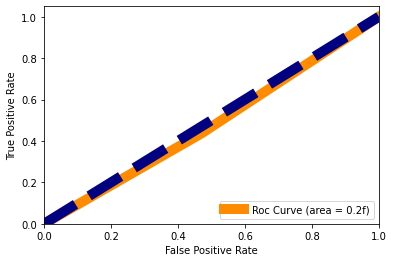

In [165]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label="Roc Curve (area = 0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=("lower right"))
plt.show()


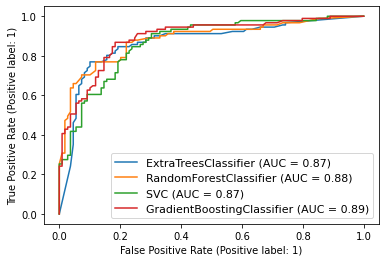

In [164]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(ET,x_test,y_test) # ax = Axes with confusion matrix
plot_roc_curve(RFC,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plt.legend(prop={"size":11},loc = "lower right")
plt.show()

# Model Saving

In [166]:
import pickle
filename = "Titanic_Survival.pkl"
pickle.dump(Final_model,open(filename,"wb"))

Conclusion:

In [184]:
import numpy as np
a = np.array(y_test)
b = a.ravel()
predicted = np.array(Final_model.predict(x_test))
dfcon = pd.DataFrame({"Original ":b,"Predicated":predicted},index = range(len(a)))
print(dfcon)

     Original   Predicated
0            0           1
1            0           0
2            0           0
3            0           0
4            1           1
..         ...         ...
195          0           0
196          1           1
197          0           0
198          1           1
199          1           1

[200 rows x 2 columns]


We can review there is some error in the outcome using the model, as we can expect that because our model predict 0.82 not 100%.

# End of Project Titanic